# ATB Electricity 2022

In this notebook, we demonstrate how to access and visualize the 2022 ATB database that is stored in the AWS cloud.

The following site-packages are required for this notebook:

* jupyter
* pyarrow
* pandas
* matplotlib

## 1 Introduction

The ATB Electricity data sets from 2019 through 2022 are managed by the [Open Energy Data Initiative](https://openei.org/wiki/Open_Energy_Data_Initiative_(OEDI)) and stored in the [OEDI Data Lake](https://data.openei.org/s3_viewer?bucket=oedi-data-lake&prefix=ATB%2Felectricity%2F) on AWS. For more information about the ATB, please refer to our website, [https://atb.nrel.gov/](https://atb.nrel.gov/).

### 1.1 Import Data

The first step in this notebook is to import the 2022 data into a Pandas dataframe.

In [1]:
import pandas as pd

url = 'https://oedi-data-lake.s3.amazonaws.com/ATB/electricity/parquet/2022/ATBe.parquet'
raw_data = pd.read_parquet(url)
raw_data = raw_data.astype(
                      dtype = {
                          'core_metric_key': 'string',
                          'core_metric_parameter': 'string',
                          'core_metric_case': 'string',
                          'crpyears': 'string',
                          'technology': 'string',
                          'technology_alias': 'string',
                          'techdetail': 'string', 
                          'display_name': 'string',
                          'scenario': 'string',
                          'units': 'string'
                      })
print('Columns: \n')
print(raw_data.dtypes)

Columns: 

atb_year                   int64
core_metric_key           string
core_metric_parameter     string
core_metric_case          string
crpyears                  string
technology                string
technology_alias          string
techdetail                string
display_name              string
default                  float64
scenario                  string
core_metric_variable      object
units                     string
value                    float64
dtype: object


### 1.2 Explore Data

A Pandas dataframe has great functionality for exploring and filtering the data.

In [2]:
from pprint import pprint

# The 'unique()' method lets you see a list of unique values in a given column.

print('Here are all of the parameters present in this dataset:\n')
pprint(list(raw_data.core_metric_parameter.unique()))

print('\nHere are all of the technologies:\n')
pprint(list(raw_data.technology.unique()))

Here are all of the parameters present in this dataset:

['CAPEX',
 'Fixed O&M',
 'Variable O&M',
 'CF',
 'LCOE',
 'Fuel',
 'FCR',
 'Interest During Construction  - Nominal',
 'Inflation Rate',
 'Tax Rate (Federal and State)',
 'Calculated Rate of Return on Equity Real',
 'Calculated Interest Rate Real',
 'Debt Fraction',
 'Interest Rate Nominal',
 'Rate of Return on Equity Nominal',
 'WACC Nominal',
 'WACC Real',
 'CRF']

Here are all of the technologies:

['Coal_FE',
 'Commercial Battery Storage',
 'NaturalGas_FE',
 'Pumped Storage Hydropower',
 'Residential Battery Storage',
 'Utility-Scale Battery Storage',
 'Hydropower',
 'Biopower',
 'CSP',
 'CommPV',
 'DistributedWind',
 'Geothermal',
 'LandbasedWind',
 'OffShoreWind',
 'ResPV',
 'UtilityPV',
 'Utility-Scale PV-Plus-Battery',
 'Nuclear',
 'AEO']


In [3]:
# In Jupyter, if you attempt to print a large dataframe, it will automatically be truncated, giving you
# a convenient view of its structure and size.

raw_data

atb_year core_metric_key core_metric_parameter core_metric_case  \
0           2022   MA*CoFECCS90F                 CAPEX           Market   
1           2022   MA*CoFECCS90F                 CAPEX           Market   
2           2022   MA*CoFECCS90F                 CAPEX           Market   
3           2022   MA*CoFECCS90F                 CAPEX           Market   
4           2022   MA*CoFECCS90F                 CAPEX           Market   
...          ...             ...                   ...              ...   
281599      2022    RM*Utry**W06                   CRF              R&D   
281600      2022    RM*Utry**W06                   CRF              R&D   
281601      2022    RM*Utry**W06                   CRF              R&D   
281602      2022    RM*Utry**W06                   CRF              R&D   
281603      2022    RM*Utry**W06                   CRF              R&D   

       crpyears                     technology               technology_alias  \
0            20                        Coal_FE                           Coal   
1            20                        Coal_FE                           Coal   
2            20                        Coal_FE                           Coal   
3            20                        Coal_FE                           Coal   
4            20                        Coal_FE                           Coal   
...         ...                            ...                            ...   
281599        *  Utility-Scale PV-Plus-Battery  Utility-Scale PV-Plus-Battery   
281600        *  Utility-Scale PV-Plus-Battery  Utility-Scale PV-Plus-Battery   
281601        *  Utility-Scale PV-Plus-Battery  Utility-Scale PV-Plus-Battery   
281602        *  Utility-Scale PV-Plus-Battery  Utility-Scale PV-Plus-Battery   
281603        *  Utility-Scale PV-Plus-Battery  Utility-Scale PV-Plus-Battery   

        techdetail                   display_name  default  scenario  \
0       CCS90AvgCF                   Coal-90%-CCS      1.0  Advanced   
1       CCS90AvgCF                   Coal-90%-CCS      1.0  Advanced   
2       CCS90AvgCF                   Coal-90%-CCS      1.0  Advanced   
3       CCS90AvgCF                   Coal-90%-CCS      1.0  Advanced   
4       CCS90AvgCF                   Coal-90%-CCS      1.0  Advanced   
...            ...                            ...      ...       ...   
281599           *  Utility-Scale PV-Plus-Battery      0.0  Moderate   
281600           *  Utility-Scale PV-Plus-Battery      0.0  Moderate   
281601           *  Utility-Scale PV-Plus-Battery      0.0  Moderate   
281602           *  Utility-Scale PV-Plus-Battery      0.0  Moderate   
281603           *  Utility-Scale PV-Plus-Battery      0.0  Moderate   

       core_metric_variable units        value  
0                      2020  $/kW  5541.600067  
1                      2021  $/kW  5541.600067  
2                      2022  $/kW  5170.403865  
3                      2023  $/kW  5130.889431  
4                      2024  $/kW  5091.374996  
...                     ...   ...          ...  
281599                 2046                NaN  
281600                 2047                NaN  
281601                 2048                NaN  
281602                 2049                NaN  
281603                 2050                NaN  

[281604 rows x 14 columns]

### 1.3 Simple plot

Next, let's make a simple plot to see the projected levelized cost of energy for land based wind power (class 10). In this dataset, 'core_metric_variable' corresponds to year in this time series data.

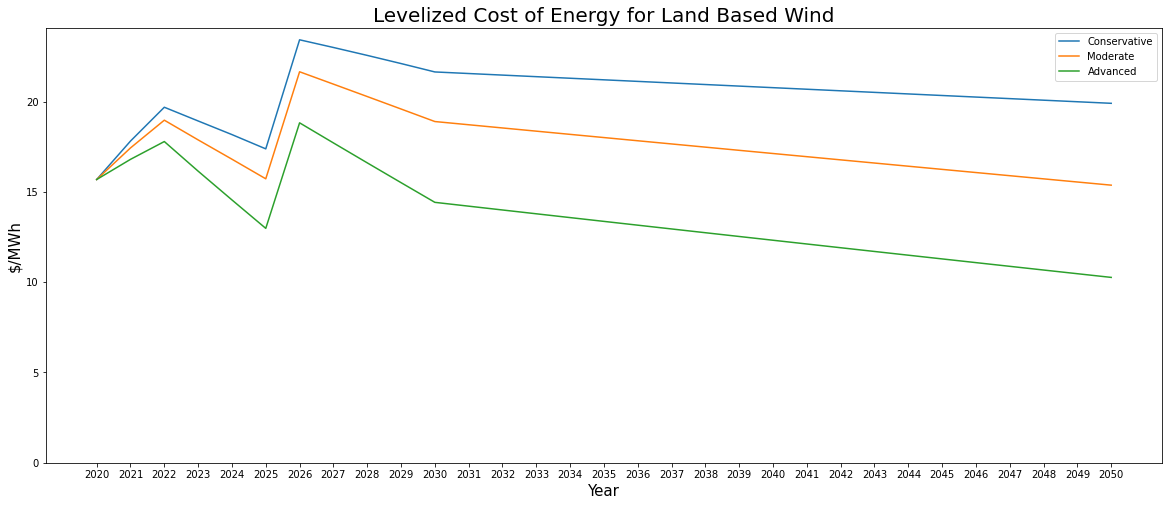

In [4]:
import matplotlib.pyplot as plt

df = raw_data[
    (raw_data.core_metric_parameter == 'LCOE') &
    (raw_data.core_metric_case == 'Market') &
    (raw_data.crpyears == '30') &
    (raw_data.technology == 'LandbasedWind') &
    (raw_data.techdetail == 'Class1')
]
units = df.units.iloc[0]
scenarios = ['Conservative', 'Moderate', 'Advanced']

fig = plt.figure(figsize=(20,8))
for scenario in scenarios:
    plt.plot(
        df[df.scenario == scenario].core_metric_variable,
        df[df.scenario == scenario].value,
        figure = fig
        )
plt.title('Levelized Cost of Energy for Land Based Wind', size=20)
plt.xlabel('Year', size=15)
plt.ylabel(units, size=15)
plt.ylim(bottom=0)
plt.legend(scenarios);

# 2 Financial Data

## 2.1 Filtering

Let's capture all the financial data. Note that 'core_metric_variable' is actually the year in this time series data, and 'value' is the value of the 'core_metric_parameter' given as a decimal rate.

In [5]:
# Select columns of interest
df = raw_data[[
    'core_metric_parameter',
    'core_metric_case',
    'crpyears',
    'technology',
    'scenario',
    'core_metric_variable',
    'value']]

# Select rows that correspond to the financial parameters
df = df[df.core_metric_parameter.isin([
    'Calculated Rate of Return on Equity Real',
    'Calculated Interest Rate Real',
    'Debt Fraction',
    'FCR',
    'Interest Rate Nominal',
    'Rate of Return on Equity Nominal',
    'WACC Nominal',
    'WACC Real'])]

# Additional filtering
df = df[
    (df.technology != 'AEO') &
    (df.crpyears.isin(['30','*'])) &
    (df.scenario == 'Moderate')]

## 2.2 Visualization

Now that we have a dataframe of the financials, we can build interactive plots using ipywidgets. We also add functionality for the user to export their data selection as a .csv.

In [6]:
import matplotlib.ticker as mtick
from ipywidgets import interact, Dropdown, widgets, Button, Layout, SelectMultiple, Output, Text
from math import ceil

In [7]:
# Note: If you run the code in section 3 and then come back to section 2, you must rerun this cell for it to work properly.

print('Select multiple technologies by using ctrl-click')

# Define style for widgets
style = {'description_width': 'initial'}

# Get unique values for user controls
core_metric_parameter = df.core_metric_parameter.unique()
technology_options = df.technology.unique()

# Find a reasonable maximum value for the y-axis for each core_metric_parameter
ymax = {}
for metric in core_metric_parameter:
    ymax[metric] = ceil((df[df['core_metric_parameter'] == metric].value.max() + .01) * 10)/10
    
# Make widgets
core_metric_parameter_W = Dropdown(options = core_metric_parameter, style = style)
technology_W = SelectMultiple(options = technology_options, style = style, value = [technology_options[0]])

# Text widget for export filename
filename_W = Text(
    value='ATB_filtered_financials.csv',
    description='File Name:',
    disabled=False
)

# The interact decorator calls the function below to continuously listen for inputs from
# the widgets and then filter and plot the corresponding data. 
@interact
def atb_filter_options(
    # set up the variables to "listen" to the inputs from the widgets
    core_metric_parameter = core_metric_parameter_W, 
    technology = technology_W,
    filename = filename_W
    ):

    # filter the df based on the user's choices in the dropdowns
    df_f = df[
    (df['core_metric_parameter'] == core_metric_parameter) &
    (df.technology.isin(technology))
    ]

    df_market = df_f[df_f['core_metric_case'] == 'Market']
    df_RandD = df_f[df_f['core_metric_case'] == 'R&D']

    # Plot the data
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (8,5), sharey = True)
    fig.suptitle(core_metric_parameter)
    for tech in technology:
        df_market[df_market['technology'] == tech].plot(x = 'core_metric_variable', y = 'value', ax = ax1, xlabel = 'year', title = 'Market')
        df_RandD[df_RandD['technology'] == tech].plot(x = 'core_metric_variable', y = 'value', ax = ax2, xlabel = 'year', title = 'R & D')
    ax1.get_legend().remove()
    ax1.set_ylim(ymin = 0, ymax = ymax[core_metric_parameter])
    ax1.yaxis.set_major_formatter(mtick.PercentFormatter(1.0)) # Converts the decimal rate value to be displayed as a percentage
    ax2.legend(technology, loc='center left', bbox_to_anchor=(1, 0.5))

    # Now we set up widgets to facilitate exporting the data to a file

    # Make and style a Button widget to trigger data export
    button = Button(description="Export Selection to .csv", layout = Layout(width = '200px', height = '50px'))
    button.style.button_color = 'green'

    # Make a widget for output
    output = Output()
    
    # Set button action that will export the ATB dataset, filtered as per user's dropdown choices, once they click the button
    def on_button_clicked(b):
        with output:
            df_f.to_csv(filename)
            print("CSV Export Successful!")
    
    # Display button and link to action
    display(button, output)
    button.on_click(on_button_clicked)

Select multiple technologies by using ctrl-click


interactive(children=(Dropdown(description='core_metric_parameter', options=('FCR', 'Calculated Rate of Return…

# 3 Core Metrics
## 3.1 Run Query
Next, let's make a new dataframe by querying the core metrics.

In [8]:
df_CM = raw_data[[
    'core_metric_parameter',
    'core_metric_case',
    'crpyears',
    'technology',
    'techdetail',
    'scenario',
    'units',
    'core_metric_variable',
    'value'
]]

df_CM = df_CM[df_CM.core_metric_parameter.isin([
    'LCOE',
    'CAPEX',
    'CF',
    'Fixed O&M',
    'Variable O&M'
])]

df_CM = df_CM[df_CM.technology != 'AEO']

## 3.2 Visualization

Just like before, once we have a dataframe, we can use ipywidgets to build visualizations and export functionality.

In [9]:
import numpy as np

# Define style for widgets
style = {'description_width': 'initial'}

# Get unique values for user controls
core_metric_parameters = df_CM.core_metric_parameter.unique()
technology_options = df_CM.technology.unique()
case_options = df_CM.core_metric_case.unique()

# List of scenarios for filtering and legend
scenarios = ['Conservative', 'Moderate', 'Advanced']

# Create dictionary of max values for the y-scales in the plots based on technology and core_metric_parameter
ymax = {}
for tech in technology_options:
    ymax[tech] = {}
    for metric in core_metric_parameters:
        x = df_CM[(df_CM['core_metric_parameter'] == metric) & (df_CM['technology'] == tech)].value.max()
        if np.isnan(x) or x == 0:
            ymax[tech][metric] = 1
        else:
            ymax[tech][metric] = x * 1.1

# Create dictionary of units to label the y-axes
ylabels = {}
for metric in core_metric_parameters:
    units = df_CM[df_CM['core_metric_parameter'] == metric].iloc[0]['units']
    if type(units) == str:
        ylabels[metric] = units
    else:
        ylabels[metric] = ''

# Make widgets
technology_W = Dropdown(options = technology_options, style = style)
case_W = Dropdown(options = case_options, style = style)
crpyears_W = Dropdown(style = style)
tech_detail_W = Dropdown(style = style)

# The options for crpyears and tech_detail depend on which technology is selected. We need to make these
# widgets update based on the technology_W widget.
crpyears_dict = {}
tech_detail_dict = {}
for item in technology_options: 
    crpyears_dict[item] = list(df_CM[df_CM['technology'] == item].crpyears.unique())
    tech_detail_dict[item] = list(df_CM[df_CM['technology'] == item].techdetail.unique())

def update_W_options(*args): 
    crpyears_W.options = crpyears_dict[technology_W.value]
    tech_detail_W.options = tech_detail_dict[technology_W.value]

technology_W.observe(update_W_options)

# Text widget for export filename
filename_W = Text(
    value='ATB_filtered_core_metrics.csv',
    description='File Name:',
    disabled=False
)

# The interact decorator calls the function below to continuously listen for inputs from
# the widgets and then filter and plot the corresponding data. 
@interact
def atb_filter_options(
    # Set up the variables to "listen" to the inputs from the widgets 
    technology = technology_W,
    case = case_W,
    crpyears = crpyears_W, 
    tech_detail = tech_detail_W,
    filename = filename_W,
    ):

    # Filter the df based on the user's choices in the dropdowns
    df_CM_f = df_CM[
    (df_CM['technology'] == technology) &
    (df_CM['core_metric_case'] == case) &
    (df_CM['crpyears'] == crpyears) &
    (df_CM['techdetail'] == tech_detail)
    ]

    # Plot the data in a grid
    fig, ((ax1, ax2, ax3),(ax4, ax5, ax6)) = plt.subplots(2, 3, figsize = (10,6))
    axes = iter([ax1, ax2, ax3, ax4, ax5])
    ax6.set_axis_off()
    for cmp in core_metric_parameters:
        ax = next(axes)
        ax.set_ylim(ymin = 0, ymax = ymax[technology][cmp])
        for scenario in scenarios:
            df_CM_f[(df_CM_f['core_metric_parameter'] == cmp) & (df_CM_f['scenario'] == scenario)].plot(
                x = 'core_metric_variable',
                y = 'value', ax = ax,
                xlabel = 'Year',
                ylabel = ylabels[cmp],
                title = cmp)
        ax.get_legend().remove()
    
    ax5.legend(scenarios, loc='center left', bbox_to_anchor=(1, 0.5))
    plt.tight_layout()
    
    # Now we set up widgets to facilitate exporting the data to a file

    # Make and style a Button widget to trigger data export
    button = Button(description="Export Selection to .csv", layout = Layout(width = '200px', height = '50px'))
    button.style.button_color = 'green'

    # Make a widget for output
    output = Output()
    
    # Set button action that will export the ATB dataset, filtered as per user's dropdown choices, once they click the button
    def on_button_clicked(b):
        with output:
            df_CM_f.to_csv(filename)
            print("CSV Export Successful!")
    
    # Display button and link to action
    display(button, output)
    button.on_click(on_button_clicked)
    

interactive(children=(Dropdown(description='technology', options=('Coal_FE', 'Commercial Battery Storage', 'Na…